# Read Dataset and Get Characteristics

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [2]:
#First, read it in as a normal dataframe
df = pd.read_csv(r".\eu_airlines\edges.csv")
df.head()

,# source,target,weight,layer
0,0,1,1,1
1,0,37,1,1
2,0,251,1,3
3,0,70,1,4
4,0,63,1,14


In [3]:
df = df.iloc[:, 0:2]
df.rename(columns={'# source':'s', ' target':'t'}, inplace=True)
df

,s,t
0,0,1
1,0,37
2,0,251
3,0,70
4,0,63
...,...,...
3583,383,396
3584,385,413
3585,409,420
3586,435,444


In [4]:
#Convert it to a graph
#Each row is an edge with a source and a target. The network will automatically create nodes for you based on their names.
g = nx.from_pandas_edgelist(df, source='s', target='t')
print(nx.info(g))

Graph with 417 nodes and 2953 edges


In [5]:
g = g.to_undirected()

In [6]:
#Get Simple Graph
#Remove self-loops

g.remove_edges_from(nx.selfloop_edges(g))
print(nx.info(g))

Graph with 417 nodes and 2953 edges


# Check connectedness

In [7]:
nx.is_connected(g)

True

In [8]:
nx.number_connected_components(g)

1

# Relabel it all if nodes are strings
- To be able to run all types of correlation together
- But put the graph relabled in `g_relabled`

In [9]:
from myTruss import mappingAndRelabeling

In [10]:
g_relabled = mappingAndRelabeling(g)

In [11]:
"""Before""" 
print(nx.info(g))

Graph with 417 nodes and 2953 edges


In [12]:
"""Before""" 
print(nx.info(g_relabled))

Graph with 417 nodes and 2953 edges


In [13]:
g = g_relabled

# Modular Centrality 1: Comm Centrality

In [14]:
# Read Centrality
dict_com_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_com.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_com_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [15]:
dict_com_read[1]

19.562082783601774

# Modular Centrality 2: CBM - Community-based Mediator

In [16]:
# Read Centrality
dict_cbm_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_cbm.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_cbm_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [17]:
dict_cbm_read[1]

0.0012931880450018501

# Modular Centrality 3: Community Hub-Bridge centrality

In [18]:
# Read Centrality
dict_chb_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_chb.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_chb_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [19]:
dict_chb_read[0]

0.7961630695443646

# Modular Centrality 4: K-shell with community centrality

In [20]:
# Read Centrality
dict_kshell_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_kshell.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_kshell_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [21]:
dict_kshell_read[1]

13.5

# Modular Centrality 5: Community Based Centrality

In [22]:
# Read Centrality
dict_cbc_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_cbc.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_cbc_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [23]:
dict_cbc_read[1]

66.58273381294957

# Modular Centrality 6: Participation Coefficient

In [24]:
# Read Centrality
dict_pc_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines/dict_pc.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_pc_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [25]:
dict_pc_read[1]

0.1649559231976815

# Modular Centrality 7: Mod Vitality

In [26]:
# Read Centrality
dict_modv_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_original_modv.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_modv_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [27]:
dict_modv_read[1]

-0.0034346499624277743

In [30]:
import collections
import heapq
import operator

# Returns a list of the top_k nodes and their centralities, and heap (list) of top k nodes --> heap will be used for removal
def get_top_k_best_nodes(dict_centrality, k):
    
    # The sorted() function returns a sorted list of the specified iterable object
    top_k = sorted(dict_centrality.items(), key=operator.itemgetter(1), reverse=True)[:k]
    first_nodes = heapq.nlargest(k, dict_centrality, key=dict_centrality.get)
    
    return top_k, first_nodes

In [31]:
network_size = len(g.nodes())
network_size

417

## Pos to neg

In [34]:
dict_original_modv = dict_modv_read
x_top, y_top = get_top_k_best_nodes(dict_original_modv, network_size)

In [35]:
x_top[0]

(22, 0.012797981570675507)

# Correlation between centralities

In [36]:
# Mixed Centralities
d1 = dict_original_modv
d2 = dict_com_read
d3 = dict_cbm_read
d4 = dict_chb_read
d5 = dict_pc_read
d6 = dict_kshell_read
d7 = dict_cbc_read

In [37]:
df = pd.DataFrame([d1, d2, d3, d4, d5, d6, d7]).T

df.rename(columns={0: "ModV-PosToNeg",
                   1: "Comm",
                   2: "CBM",
                   3: "CHB",
                   4: "PC",
                   5: "KshellWithCommunity",
                   6: "CBC"
                  }, inplace=True)
df

,ModV-PosToNeg,Comm,CBM,CHB,PC,KshellWithCommunity,CBC
0,-0.000426,0.608326,-0.000000,0.796163,0.000000,6.5,10.350120
1,-0.003435,19.562083,0.001293,0.752544,0.164956,13.5,66.582734
2,-0.003663,13.217626,0.000985,0.766393,0.113800,13.5,75.278177
3,-0.003455,6.696991,0.000500,0.778098,0.058770,13.0,76.525180
4,-0.001890,4.544455,0.000493,0.768078,0.108224,13.0,39.952038
...,...,...,...,...,...,...,...
412,-0.000033,0.046794,-0.000000,0.796163,0.000000,1.0,0.796163
413,0.000579,6.666667,-0.000000,0.004796,0.000000,1.0,0.004796
414,-0.000065,0.093589,-0.000000,0.796163,0.000000,1.5,1.592326
415,-0.000033,0.046794,-0.000000,0.796163,0.000000,1.0,0.796163


In [38]:
df_kendall = df.corr(method='kendall')
df_kendall

,ModV-PosToNeg,Comm,CBM,CHB,PC,KshellWithCommunity,CBC
ModV-PosToNeg,1.000000,-0.393507,-0.210610,-0.183647,-0.095236,-0.699373,-0.850807
Comm,-0.393507,1.000000,0.574291,-0.485126,0.504689,0.645170,0.488813
CBM,-0.210610,0.574291,1.000000,-0.488411,0.808999,0.451144,0.351990
CHB,-0.183647,-0.485126,-0.488411,1.000000,-0.636272,-0.076968,0.135136
PC,-0.095236,0.504689,0.808999,-0.636272,1.000000,0.321699,0.223639
KshellWithCommunity,-0.699373,0.645170,0.451144,-0.076968,0.321699,1.000000,0.805220
CBC,-0.850807,0.488813,0.351990,0.135136,0.223639,0.805220,1.000000


<AxesSubplot:>

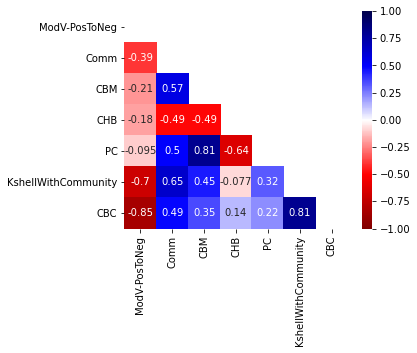

In [39]:
fig, ax = plt.subplots(figsize=(5, 4)) 
mask = np.zeros_like(df.corr(method='kendall'))
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(method='kendall'), mask= mask, ax= ax, annot= True, vmin=-1, vmax=1, cmap="seismic_r")

In [39]:
df_kendall.to_csv("./HeatmapsSaved/Infra-EUAirlines-CorrelationWithMV+Only.csv", header=True, index=True)